In [1]:
pip install numpy scikit-learn opencv-python

^C
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.7 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 526.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.2/12.9 MB 6.1 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.9 MB 7.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/12.9 MB 7.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.9 MB 5.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/12.9 MB 7.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/12.9 MB 7.4 MB/s eta 0:00:02
   ------- ----

In [2]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 330.3 kB/s eta 0:01:58
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.5/38.8 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.8 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.0/38.8 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.3/38.8 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.8 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.9/38.8 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.2/38.8 MB 4.9 MB/s eta 0:00:08
   -- ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import cv2
print(cv2.__version__)

4.10.0


In [7]:
pip install scikit-learn


  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.8 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/301.8 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/301.8 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.8 kB 281.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.8 kB 281.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.8 kB 281.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.8 kB 281.8 kB/s eta 0:00:01
   ----- --------------

In [8]:
import sklearn
print(sklearn.__version__)

1.5.2


1. 데이터 준비 및 전처리 

In [9]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 이미지 불러오기 함수 (예시)
def load_images(image_paths):
    data = []
    labels = []
    
    for image_path, label in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))  # 이미지를 28x28 크기로 조정
        image = image.flatten()  # 1D 벡터로 변환
        data.append(image)
        labels.append(label)
    
    return np.array(data), np.array(labels)

# X, O 이미지 경로와 레이블 준비
image_paths = [
    ('x_image1.png', 'X'), ('o_image1.png', 'O'),
    # 추가 이미지들...
]

# 데이터 불러오기
X, y = load_images(image_paths)

# 레이블을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


2. 머신러닝 모델 훈련

In [10]:
# Logistic Regression 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


NameError: name 'X_train' is not defined

3. 새로운 이미지 분류 

In [12]:
# 새로운 이미지를 분류하는 함수
def classify_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))  # 이미지를 28x28 크기로 조정
    image = image.flatten().reshape(1, -1)  # 1D 벡터로 변환
    prediction = model.predict(image)
    return le.inverse_transform(prediction)[0]

# 새로운 이미지 분류 테스트
print(classify_image('new_x_or_o_image.png'))  # 예: 'X' 또는 'O'


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


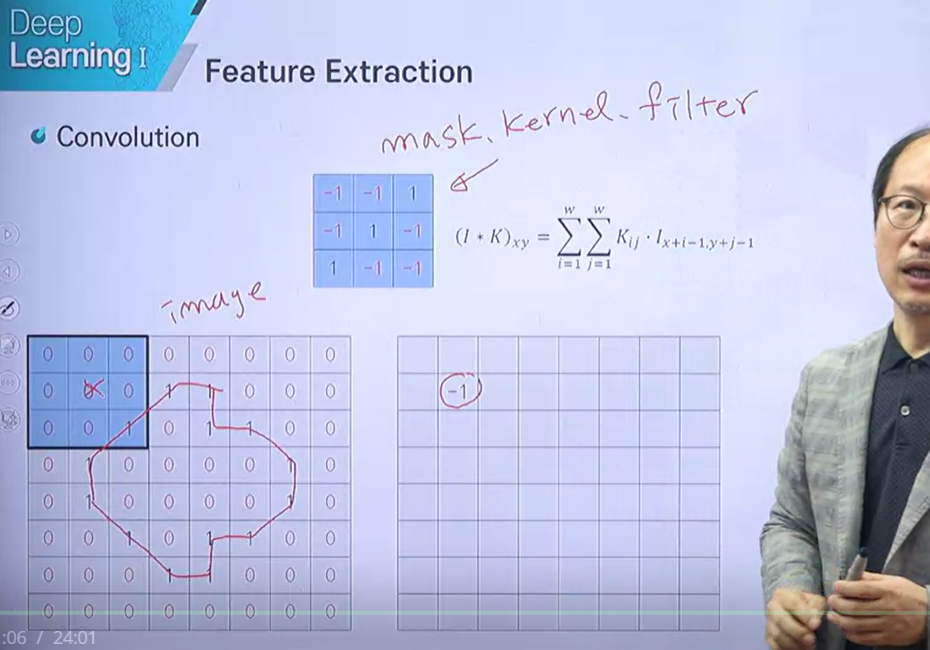

=> 값과 위치가 저장됨

Summary
- Local Feature Extraction
- Structure
	- Convertible to Fully Connected Neural Networks
	- Partially Connected & Shared Weights
- Application
	 - Image Processing
	 - Sequential Data Processing